In [2]:
library(rstan)
library(bayesplot)
library(ggfortify)
library(gridExtra)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
source("plotSSM.R", encoding = "utf-8")

In [3]:
sales_df_3  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/5-5-1-sales-ts-3.csv")
sales_df_3$date <- as.POSIXct(sales_df_3$date)

In [4]:
head(sales_df_3)

date,sales
<dttm>,<dbl>
2010-01-01,93.5
2010-01-02,81.9
2010-01-03,91.0
2010-01-04,91.2
2010-01-05,102.5
2010-01-06,92.7


In [5]:
summary(sales_df_3)

      date                         sales      
 Min.   :2010-01-01 00:00:00   Min.   : 81.9  
 1st Qu.:2010-01-25 18:00:00   1st Qu.:135.4  
 Median :2010-02-19 12:00:00   Median :159.2  
 Mean   :2010-02-19 12:00:00   Mean   :149.1  
 3rd Qu.:2010-03-16 06:00:00   3rd Qu.:166.7  
 Max.   :2010-04-10 00:00:00   Max.   :185.8  

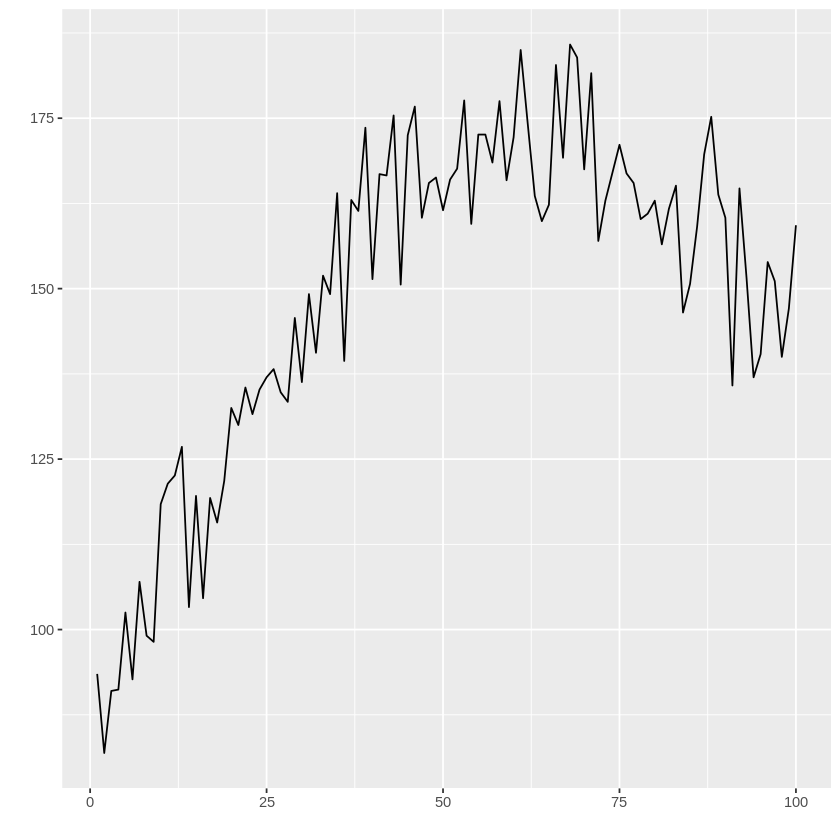

In [7]:
autoplot(ts(sales_df_3[,-1]))

In [15]:
data_list <- list(
    y = sales_df_3$sales,
    T = nrow(sales_df_3)
)

local_level <- stan(
    file = "5-2-1-local-level.stan",
    data = data_list,
    seed = 1
)

print(local_level,
      par = c("s_w", "s_v", "lp__"),
      probs = c(0.025, 0.5, 0.975),
)

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”

Inference for Stan model: 5-2-1-local-level.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean    sd    2.5%     50%   97.5% n_eff Rhat
s_w     4.25    0.04  0.84    2.85    4.16    6.18   430 1.01
s_v     7.58    0.02  0.73    6.24    7.55    9.04  2021 1.00
lp__ -438.56    0.76 15.16 -469.30 -438.34 -408.75   401 1.01

Samples were drawn using NUTS(diag_e) at Sun Jul 28 06:10:58 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [17]:
smooth_trend <- stan(
    file = "5-5-1-local-smooth-trend.stan",
    data = data_list,
    seed = 1,
    iter = 8000,
    warmup = 2000,
    thin = 6,
    control = list(adapt_delta = 0.9, max_treedepth = 15)
)

print(smooth_trend,
      par = c("s_z", "s_v", "lp__"),
      probs = c(0.025, 0.5, 0.975)
)

Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Inference for Stan model: 5-5-1-local-smooth-trend.
4 chains, each with iter=8000; warmup=2000; thin=6; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean    sd    2.5%     50%   97.5% n_eff Rhat
s_z     0.27    0.01  0.12    0.13    0.25    0.58   460    1
s_v     8.42    0.01  0.63    7.29    8.37    9.77  4235    1
lp__ -175.08    1.70 36.94 -256.09 -173.41 -111.05   471    1

Samples were drawn using NUTS(diag_e) at Sun Jul 28 06:40:41 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [18]:
local_linear_trend <- stan(
    file = "5-5-2-local-linear-trend.stan",
    data = data_list,
    seed = 1,
    iter = 8000,
    warmup = 2000,
    thin = 6
)

print(local_linear_trend,
      par = c("s_w", "s_z", "s_v", "lp__"),
      probs = c(0.025, 0.5, 0.975)
)

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 17 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more i

Inference for Stan model: 5-5-2-local-linear-trend.
4 chains, each with iter=8000; warmup=2000; thin=6; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean    sd    2.5%     50%  97.5% n_eff Rhat
s_w     1.46    0.05  0.83    0.31    1.33   3.37   270 1.01
s_z     0.28    0.01  0.12    0.12    0.26   0.59   420 1.02
s_v     8.26    0.01  0.66    7.05    8.22   9.61  2893 1.00
lp__ -244.17    4.93 73.38 -380.52 -248.98 -93.39   221 1.01

Samples were drawn using NUTS(diag_e) at Sun Jul 28 07:06:26 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


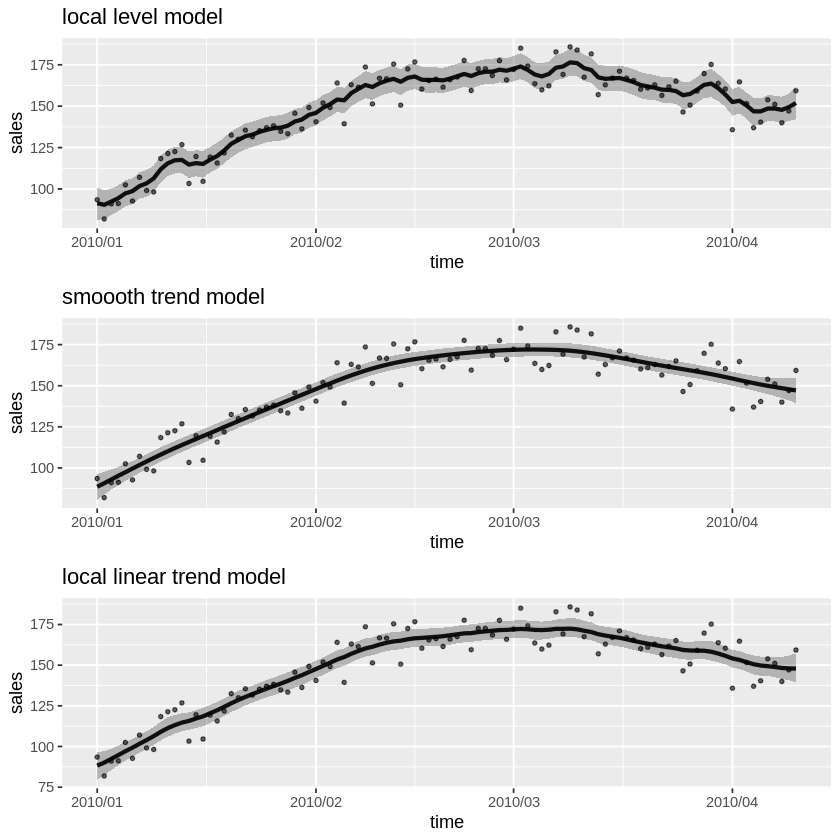

In [19]:
mcmc_sample_ll <- rstan::extract(local_level)
mcmc_sample_st <- rstan::extract(smooth_trend)
mcmc_sample_llt <- rstan::extract(local_linear_trend)

p_ll <- plotSSM(mcmc_sample = mcmc_sample_ll,
                    time_vec = sales_df_3$date,
                    obs_vec = sales_df_3$sales,
                    state_name = "mu",
                    graph_title = "local level model",
                    y_label = "sales"
               )
p_st <- plotSSM(mcmc_sample = mcmc_sample_st,
                    time_vec = sales_df_3$date,
                    obs_vec = sales_df_3$sales,
                    state_name = "mu",
                    graph_title = "smoooth trend model",
                    y_label = "sales"
               )
p_llt <- plotSSM(mcmc_sample = mcmc_sample_llt,
                    time_vec = sales_df_3$date,
                    obs_vec = sales_df_3$sales,
                    state_name = "mu",
                    graph_title = "local linear trend model",
                    y_label = "sales"
                )

grid.arrange(p_ll, p_st, p_llt)

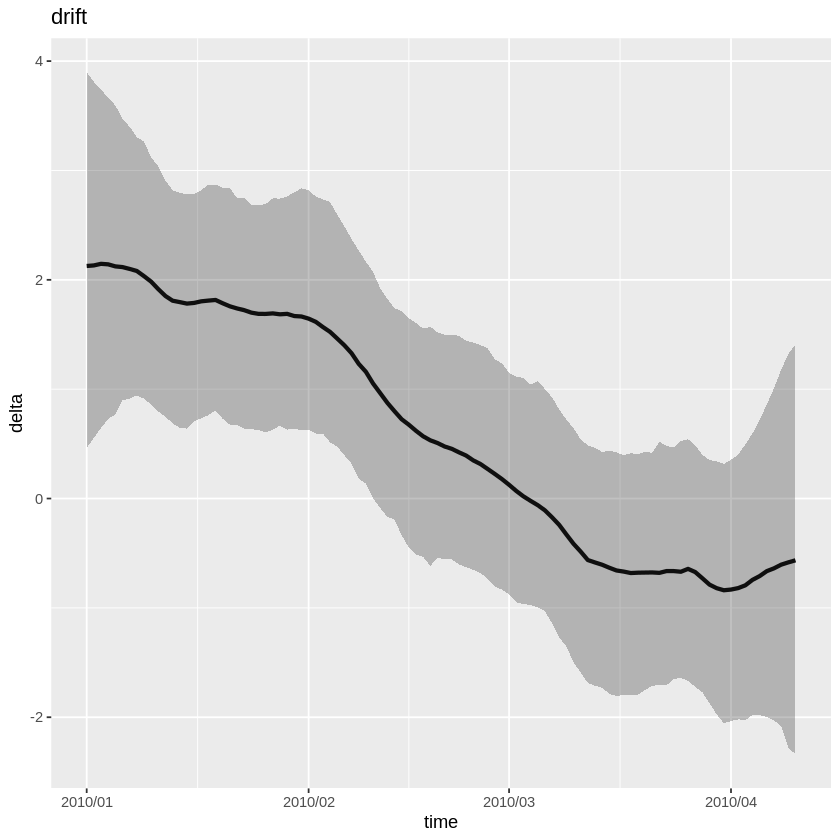

In [20]:
plotSSM(
    mcmc_sample = mcmc_sample_llt,
    time_vec = sales_df_3$date,
    state_name = "delta",
    graph_title = "drift",
    y_label = "delta"
)